Dataset Food101
    Number of datapoints: 75750
    Root location: ./data/Food101/
    split=train
    StandardTransform
Transform: ToTensor()
Shape of train_data[9709][0]: torch.Size([3, 512, 512])


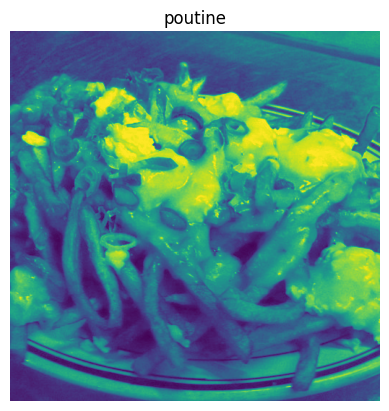

In [81]:
import torch
from torchvision.datasets import Food101
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
RAND_SEED = 2697

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_data = Food101(root="./data/Food101/",
                     split="train",
                     download=True,
                     transform=ToTensor(),
                     target_transform=None)
test_data = Food101(root="./data/Food101/",
                     split="test",
                     download=True,
                     transform=ToTensor(),
                     target_transform=None)

# Get class list
classes = train_data.classes

# Check data
i = 9709
print(train_data)
print(f"Shape of train_data[{i}][0]: {train_data[i][0].shape}")
label = classes[train_data[i][1]]
plt.imshow(train_data[i][0][0].squeeze())
plt.title(label)
plt.axis(False);